# Pregunta 2

**Utilice los datos de diabetes de la tarea.**

1.	Aplique al menos 3 métodos de clustering a los datos y explique en que difieren los resultados.
2.	¿Cuántos clusters deben reportarse como resultado? Justifique su respuesta.
3.	Explique qué decisiones subjetivas tuvo que tomar al hacer el análisis de clustering. Trate de justificar dichas decisiones.


In [6]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Cargar el dataset de diabetes
diabetes_data = pd.read_csv('data/diabetes.csv')

In [7]:
diabetes_data.head()

,glucose.area,insulin.area,SSPG,relative.weight,fasting.plasma.glucose,class
0,0.81,80,356,124,55,3
1,0.95,97,289,117,76,3
2,0.94,105,319,143,105,3
3,1.04,90,356,199,108,3
4,1.00,90,323,240,143,3


In [4]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   glucose.area            145 non-null    float64
 1   insulin.area            145 non-null    int64  
 2   SSPG                    145 non-null    int64  
 3   relative.weight         145 non-null    int64  
 4   fasting.plasma.glucose  145 non-null    int64  
 5   class                   145 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 6.9 KB


In [8]:
diabetes_data.nunique()

glucose.area               45
insulin.area               66
SSPG                      118
relative.weight           114
fasting.plasma.glucose    119
class                       3
dtype: int64

In [9]:
# Eliminar la columna 'class' del dataset para evitar sesgo en el clustering
X = diabetes_data.drop('class', axis=1)

C:\Users\52552\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\52552\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\52552\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\5

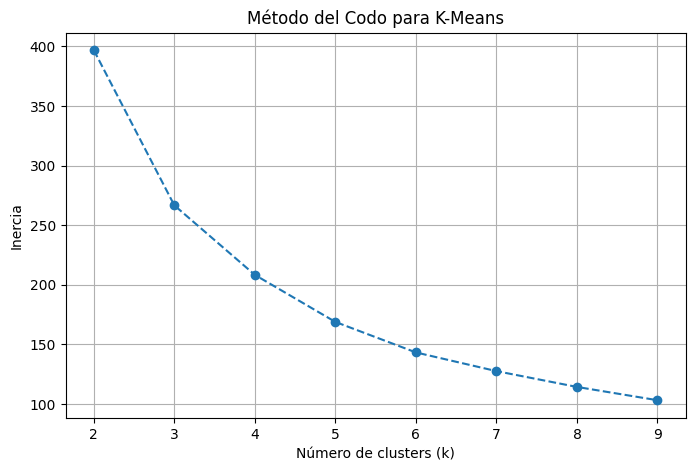

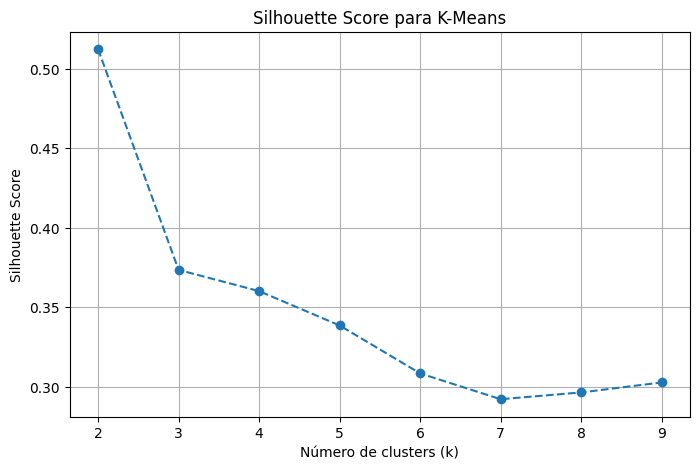

C:\Users\52552\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


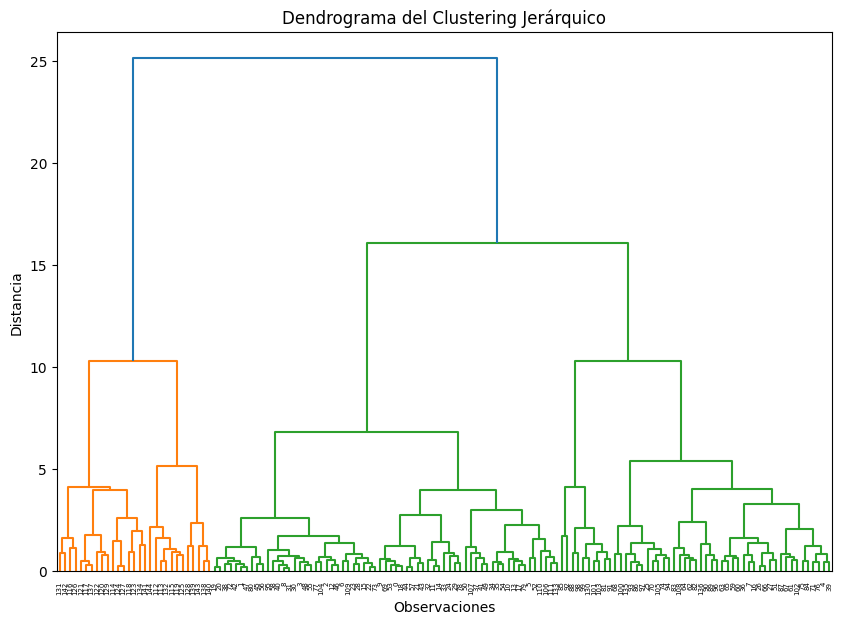

Distribución de clusters K-Means: [70 55 20]
Distribución de clusters Jerárquico: [29 51 65]
Distribución de clusters DBSCAN: [98  6 31  4  6]
Silhouette Score para K-Means: 0.37334546455738127
Silhouette Score para Clustering Jerárquico: 0.3649050488671327


In [10]:
# Preprocesamiento: Escalamiento de los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 1. Clustering K-Means
kmeans_inertia = []
silhouette_scores = []

# Probar con diferentes valores de k para el método del codo
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    kmeans_inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Gráfico del método del codo
plt.figure(figsize=(8, 5))
plt.plot(range(2, 10), kmeans_inertia, marker='o', linestyle='--')
plt.title('Método del Codo para K-Means')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.grid(True)
plt.show()

# Mostrar las puntuaciones del silhouette
plt.figure(figsize=(8, 5))
plt.plot(range(2, 10), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score para K-Means')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# Elegir el mejor número de clusters basado en el método del codo
best_k = 3  # Por ejemplo, con base en el gráfico del codo
kmeans_best = KMeans(n_clusters=best_k, random_state=42)
kmeans_best.fit(X_scaled)
kmeans_labels = kmeans_best.labels_

# 2. Clustering Jerárquico
plt.figure(figsize=(10, 7))
Z = linkage(X_scaled, method='ward')
dendrogram(Z)
plt.title('Dendrograma del Clustering Jerárquico')
plt.xlabel('Observaciones')
plt.ylabel('Distancia')
plt.show()

# Aplicar el clustering jerárquico con el número óptimo de clusters (por ejemplo, 3)
hierarchical_clustering = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical_clustering.fit_predict(X_scaled)

# 3. Clustering DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Mostrar los resultados: conteo de instancias en cada cluster
print('Distribución de clusters K-Means:', np.bincount(kmeans_labels))
print('Distribución de clusters Jerárquico:', np.bincount(hierarchical_labels))
print('Distribución de clusters DBSCAN:', np.bincount(dbscan_labels + 1))  # DBSCAN usa -1 para ruido

# Evaluar con Silhouette Score para K-Means y Jerárquico
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
hierarchical_silhouette = silhouette_score(X_scaled, hierarchical_labels)

print(f'Silhouette Score para K-Means: {kmeans_silhouette}')
print(f'Silhouette Score para Clustering Jerárquico: {hierarchical_silhouette}')


In [11]:
from sklearn.metrics import confusion_matrix
from scipy.optimize import linear_sum_assignment
import numpy as np

# Recuperar las etiquetas reales (columna 'class')
true_labels = diabetes_data['class'].values

# Función para calcular la precisión de un método de clustering comparado con las clases reales
def cluster_accuracy(labels_pred, labels_true):
    # Crear la matriz de confusión
    conf_matrix = confusion_matrix(labels_true, labels_pred)
    
    # Usar el método de asignación húngaro para hacer coincidir los clusters con las clases
    row_ind, col_ind = linear_sum_assignment(-conf_matrix)  # Maximizar las coincidencias
    
    # Calcular la precisión sumando las coincidencias máximas y dividiendo por el total
    total_matches = conf_matrix[row_ind, col_ind].sum()
    accuracy = total_matches / len(labels_true)
    
    return accuracy, conf_matrix

# K-Means accuracy
kmeans_accuracy, kmeans_conf_matrix = cluster_accuracy(kmeans_labels, true_labels)
print(f'Precisión de K-Means: {kmeans_accuracy * 100:.2f}%')
print('Matriz de Confusión para K-Means:\n', kmeans_conf_matrix)

# Clustering Jerárquico accuracy
hierarchical_accuracy, hierarchical_conf_matrix = cluster_accuracy(hierarchical_labels, true_labels)
print(f'Precisión de Clustering Jerárquico: {hierarchical_accuracy * 100:.2f}%')
print('Matriz de Confusión para Clustering Jerárquico:\n', hierarchical_conf_matrix)

# DBSCAN accuracy
# Recordar que DBSCAN puede tener etiquetas de ruido (-1), así que excluimos esos puntos
dbscan_accuracy, dbscan_conf_matrix = cluster_accuracy(dbscan_labels[dbscan_labels != -1], true_labels[dbscan_labels != -1])
print(f'Precisión de DBSCAN: {dbscan_accuracy * 100:.2f}%')
print('Matriz de Confusión para DBSCAN:\n', dbscan_conf_matrix)

Precisión de K-Means: 75.17%
Matriz de Confusión para K-Means:
 [[ 0  0  0  0]
 [ 3 10 20  0]
 [ 7 29  0  0]
 [60 16  0  0]]
Precisión de Clustering Jerárquico: 77.93%
Matriz de Confusión para Clustering Jerárquico:
 [[ 0  0  0  0]
 [29  3  1  0]
 [ 0 28  8  0]
 [ 0 20 56  0]]
Precisión de DBSCAN: 61.70%
Matriz de Confusión para DBSCAN:
 [[ 0  0  0  0]
 [ 0  0  0  0]
 [ 0  2  0  0]
 [ 6 29  4  6]]
